<a href="https://colab.research.google.com/github/lenhattung/jspservlet/blob/main/Final_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2400-DS2ML2 / Machine Learning 2
## Instructor: Dr. Robert Wojciechowski
## Student: Nhat Tung Le, Id 426246



---
# Project: Youtube Spam Comments Detection Using Convolutional Neural Network (CNN) And Recurrent Neural Network (RNN) 


---



# Abstract:

In recent years, Youtube is one of the social networks attracting a lot of users. Youtube allows users to upload and share videos that they have created or collected. Users can also view and comment on their opinions or express their feelings via the like button or disk like.

A fairly common problem in YouTube commnets is spam. Many users try to believe comments that make no sense, or comment on advertising content, or some kind of appeal. Spam comments often have nothing to do with the content of the video.

In this project, I try to learn some Deep Learning and Text Mining techniques to predict spam based on commnet content. I will try to evaluate, compare and recommend a suitable model for spam prediction with YouTube content.


# 1. Introduction

## 1.1. Dataset

Dataset name: YouTube Spam Collection Data Set

It is a public set of comments collected for spam research. It has five datasets composed by 1,956 real messages extracted from five videos that were among the 10 most viewed on the collection period.
Link: https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection

**Dataset Information:**

*   Data Set Characteristics:  	Text
*   Attribute Characteristics:	N/A
*   Number of Instances:	1956
*   Number of Attributes:	5
*   Area:	Computer
*   Date Donated	2017-03-26

**Attribute Information:**

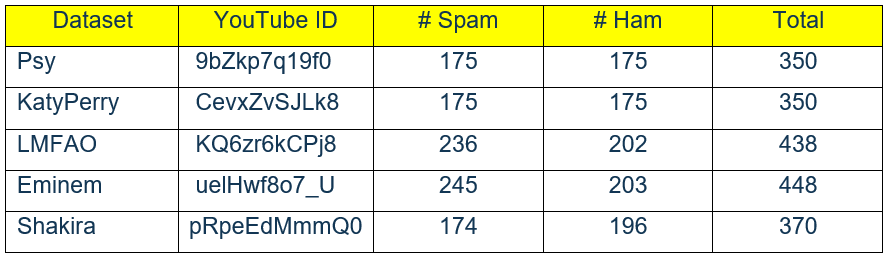

**Example:**

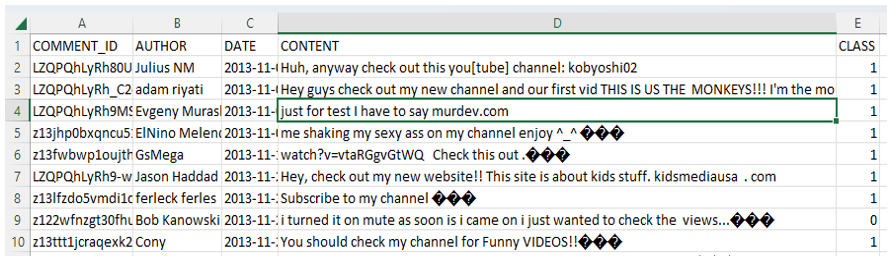


## 1.2. Methods

### 1.2.1. CNN

**A convolutional neural network (CNN)** is a type of artificial neural network that is primarily used for image and video recognition. It is made up of multiple layers, including convolutional layers, pooling layers, and fully connected layers. CNNs use a process called convolution, where a small matrix, called a filter, is moved across the input image, performing mathematical operations to extract features from the image. This process is repeated multiple times to extract multiple features from the image. The resulting features are then passed through pooling and fully connected layers to classify the image [1].

### 1.2.2. RNN

**A Recurrent Neural Network (RNN)**is a type of artificial neural network that is designed to process sequential data. It has the ability to remember the previous inputs and use them to inform the current output. RNNs have a feedback connection, which allows the network to pass on information from one step of the sequence to the next. This makes RNNs well suited for tasks such as speech recognition, natural language processing and time series prediction [2].

### 1.2.3. LSTM

**A Long Short-Term Memory (LSTM)** is a type of Recurrent Neural Network (RNN) that is designed to handle the problem of vanishing gradients in traditional RNNs. LSTMs have a memory cell, input gate, forget gate, and output gate to help control the flow of information and maintain the relevant information for longer periods of time. This makes LSTMs well suited for tasks such as natural language processing, speech recognition, and time series prediction [3].

### 1.2.4. Text processing

**Text tokenization** is the process of breaking down a piece of text into smaller units called tokens. These tokens can be words, phrases, or sentences. Tokenization is an important step in natural language processing, as it allows us to analyze and process text data more efficiently. There are different techniques for tokenizing text, such as using regular expressions, or using machine learning-based techniques like the n-gram model. The tokenization of text is essential for many NLP tasks like language modeling, text classification, and machine translation [4]. 

Text tokenization to **sequences** is the process of converting a list of tokens into a numerical representation that can be used as input for machine learning models. This process is also known as vectorization. Tokens are converted into numerical values by mapping them to a unique integer index. This is commonly done using the Tokenizer class in the Keras library, which allows you to define the vocabulary of the text, and the maximum number of words to keep in the vocabulary. This process is essential for many NLP tasks such as text classification, language modeling and machine translation [5]. 

**Word embedding** is a technique in natural language processing where words are represented as numerical vectors in a high-dimensional space. These vectors capture the semantic meaning of the words and their relationships with other words. Word embedding can be used in various natural language processing tasks such as language translation, text classification, and sentiment analysis. The most popular method for learning word embeddings is called word2vec, which uses a neural network to learn the vectors [6] . 

### 1.2.5. Combine Models

**Combining multiple models** in machine learning is a popular technique to improve the performance of a single model. This can be done by using techniques such as model ensembling, where multiple models are trained and their outputs are combined to make a final prediction. Another technique is model stacking, where the output of one model is used as an input to another model. These methods can also be used to combine models of different types, such as decision trees and neural networks [5].

# 2. Experiment

## 2.1. Preprocessing

### 2.1.1. Libraries

In [ ]:
# !pip install tensorflow
# !pip install -U scikit-learn
# !pip install keras_preprocessing

In [ ]:
import os
import numpy as np
import pandas as pd
from pandas import read_csv, concat
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential, clone_model
from keras.layers import Dense, LSTM, Embedding, Flatten, Dropout
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

## 2.1.2. Reading dataset



In [ ]:
drive.mount("/content/drive/")
path = "/content/drive/MyDrive/UW/Data/Youtube/"
# path = "C:/Users/Windows/OneDrive/Learning/WNE/SEM3/2400-DS2ML2/prject final/YouTube-Spam-Collection-v1/"
os.chdir(path)
os.listdir()

# Read all csv and combine to dataframe
Shakira = read_csv('Youtube05-Shakira.csv', delimiter=',')
Eminem = read_csv('Youtube04-Eminem.csv', delimiter=',')
LMFAO = read_csv('Youtube03-LMFAO.csv', delimiter=',')
KatyPerry = read_csv('Youtube02-KatyPerry.csv', delimiter=',')
Psy = read_csv('Youtube01-Psy.csv', delimiter=',')
df = [Shakira, Eminem, LMFAO, KatyPerry, Psy]
df = concat(df)
df.head()

### 2.1.3. Exploratory Data Analysis

In [ ]:
# Check info:
df.info()

In [ ]:
# Check the number of row and column:
num_rows = df.shape[0]
num_cols = df.shape[1]
print("Dataset has {0} rows and {1} columns.".format(num_rows, num_cols))

In [ ]:
# Distribution of target variable:
sns.countplot(x='CLASS', data=df)

### 2.1.4. Preprocessing

In [ ]:
# Since the goal of the project is to detect spam comments, the data columns COMMENT_ID, AUTHOR, DATE are unimportant. 
# Drop 3 columns: 'COMMENT_ID', 'AUTHOR', 'DATE':
columns_to_drop = ['COMMENT_ID', 'AUTHOR', 'DATE']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

In [ ]:
 # Check missing values:
missing_values = df.isnull().sum()
print(missing_values)

In [ ]:
# Tokenize the content column
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['CONTENT'])

In [ ]:
# Check some words:
i = 0;
word_index = tokenizer.word_index
for word, index in word_index.items():
    print(word, " : ", index)
    i=i+1
    if(i==20):
        break

In [ ]:
# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['CONTENT'])
for i in range(100):
    print("----{0}-----".format(i))
    print(df['CONTENT'].iloc[i])
    print(sequences[i])

### 2.1.5. Split data

In [ ]:
X = sequences
Y = df['CLASS']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

In [ ]:
# Pad the sequences to make them all the same length
max_length = max([len(s) for s in sequences])
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

In [ ]:
# Check some row:
print(len(X_train[0]))
print(len(X_test[0]))
print(X_train[0])

## 2.2. Classification

In [ ]:
# Result dataframe
rs = {
    "model": [],
    "accuracy": []
}

df_rs = pd.DataFrame(rs)

### 2.2.1. Using CNN

In [ ]:
# Define the model
model_CNN = Sequential()

# Add an Embedding layer
model_CNN.add(Embedding(input_dim=5000, output_dim=50, input_length=max_length))

# Add a 1D convolutional layer
model_CNN.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Add a max pooling layer
model_CNN.add(MaxPooling1D(pool_size=2))

# Add a flatten layer
model_CNN.add(Flatten())

# Add a dense layer
model_CNN.add(Dense(10, activation='relu'))

# Add an output layer
model_CNN.add(Dense(1, activation='sigmoid'))

# Compile the model
model_CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model_CNN.fit(X_train, Y_train, epochs=3, batch_size=5, validation_data=(X_test, Y_test))
test_loss, test_acc = model_CNN.evaluate(X_test, Y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
# predictions = model_CNN.predict(X_test)
df_rs.loc[0] =  ["CNN", test_acc]

In [ ]:
# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### 2.2.2. Using RNN

In [ ]:
# 2. RNN
# Define the model
model_RNN = Sequential()

# Add an Embedding layer
model_RNN.add(Embedding(input_dim=5000, output_dim=50, input_length=max_length))

# Add a LSTM
model_RNN.add(LSTM(100, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))

# Add 2nd LSTM
model_RNN.add(LSTM(100))
model_RNN.add(Dropout(0.2))

# Add an output layer
model_RNN.add(Dense(1, activation='sigmoid'))

# Compile the model
model_RNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_RNN.summary()


In [ ]:
# Train the model
history_2 = model_RNN.fit(X_train, Y_train, epochs=3, batch_size=5, validation_data=(X_test, Y_test))
test_loss, test_acc = model_RNN.evaluate(X_test, Y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
# predictions = model_RNN.predict(X_test)
# print(predictions)
df_rs.loc[1] =  ["RNN", test_acc]

In [ ]:
# Plot the accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
print(df_rs)

### 2.2.3. Using CNN and RNN in one model

In [ ]:
# Define the model
model_CNN_RNN = Sequential()

# Add an Embedding layer
model_CNN_RNN.add(Embedding(input_dim=5000, output_dim=50, input_length=max_length))

# Add a 1D convolutional layer
model_CNN_RNN.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Add a max pooling layer
model_CNN_RNN.add(MaxPooling1D(pool_size=2))

# Add a LSTM
model_CNN_RNN.add(LSTM(100, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))

#5 Add 2nd LSTM
model_CNN_RNN.add(LSTM(100))
model_CNN_RNN.add(Dropout(0.2))

# Add a dense layer
model_CNN_RNN.add(Dense(10, activation='relu'))

# Add an output layer
model_CNN_RNN.add(Dense(1, activation='sigmoid'))

# Compile the model
model_CNN_RNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_CNN_RNN.summary()

In [ ]:
# Train the model
history_3 = model_CNN_RNN.fit(X_train, Y_train, epochs=3, batch_size=5, validation_data=(X_test, Y_test))
test_loss, test_acc = model_CNN_RNN.evaluate(X_test, Y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
# predictions = model_CNN_RNN.predict(X_test)
# print(predictions)
df_rs.loc[2] =  ["CNN_RNN_1", test_acc]

In [ ]:
# Plot the accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### 2.2.4. Combine 2 models: CNN and RNN

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, Dense
from keras.optimizers import Adam, Nadam

def get_combine_model(X_train, Y_train, X_test, Y_test, model_CNN, model_RNN, optimizer, ):
    # Create input layers
    input_CNN = Input(shape=(X_train.shape[1],))
    input_RNN = Input(shape=(X_train.shape[1],))

    output_CNN = model_CNN(input_CNN)
    output_RNN = model_RNN(input_RNN)

    # Concatenate the outputs
    merged = concatenate([output_CNN, output_RNN])

    # Add a final dense layer to make predictions
    final_output = Dense(1, activation='sigmoid')(merged)

    # Create a new model with the combined layers
    final_model = Model(inputs=[input_CNN, input_RNN], outputs=final_output)
    
    # Optimizer
    final_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    final_model.fit([X_train, X_train], Y_train, validation_data=([X_test, X_test], Y_test), epochs=10)
    
    return final_model

def evaluate(X_test, Y_test, model):
    test_loss, test_acc = model.evaluate([X_test, X_test], Y_test)
    print('Test loss:', test_loss)
    print('Test accuracy:', test_acc)
    return test_acc

# Compile and train the final model
final_model = get_combine_model(X_train, Y_train, X_test, Y_test, clone_model(model_CNN), clone_model(model_RNN), 'adam')

In [ ]:
# Test the combine model
acc = evaluate(X_test, Y_test, final_model)
df_rs.loc[3] =  ["CNN_RNN_2", acc]

### 2.2.5. Optimize

In [ ]:
# Result dataframe
rs_2 = {
    "model": [],
    "accuracy": []
}

df_rs_2 = pd.DataFrame(rs_2)

# Optimizer "adam", learning-rate: 0.001, 0.001, 0.1
learning_rate = 0.001
final_model_adam_001 = get_combine_model(X_train, Y_train, X_test, Y_test, clone_model(model_CNN), clone_model(model_RNN), Adam(learning_rate))
acc = evaluate(X_test, Y_test, final_model_adam_001)
df_rs_2.loc[0] =  ["final_model_adam_001", acc]

learning_rate = 0.01
final_model_adam_01 = get_combine_model(X_train, Y_train, X_test, Y_test, clone_model(model_CNN), clone_model(model_RNN), Adam(learning_rate))
acc = evaluate(X_test, Y_test, final_model_adam_01)
df_rs_2.loc[1] =  ["final_model_adam_01", acc]

learning_rate = 0.1
final_model_adam_1 = get_combine_model(X_train, Y_train, X_test, Y_test, clone_model(model_CNN), clone_model(model_RNN), Adam(learning_rate))
acc = evaluate(X_test, Y_test, final_model_adam_1)
df_rs_2.loc[2] =  ["final_model_adam_1", acc]

# Optimizer "nadam", learning-rate: 0.001, 0.001, 0.1
learning_rate = 0.001
final_model_nadam_001 = get_combine_model(X_train, Y_train, X_test, Y_test, clone_model(model_CNN), clone_model(model_RNN), Nadam(learning_rate))
acc = evaluate(X_test, Y_test, final_model_nadam_001)
df_rs_2.loc[3] =  ["final_model_nadam_001", acc]

learning_rate = 0.01
final_model_nadam_01 = get_combine_model(X_train, Y_train, X_test, Y_test, clone_model(model_CNN), clone_model(model_RNN), Nadam(learning_rate))
acc = evaluate(X_test, Y_test, final_model_nadam_01)
df_rs_2.loc[4] =  ["final_model_nadam_01", acc]

learning_rate = 0.1
final_model_nadam_1 = get_combine_model(X_train, Y_train, X_test, Y_test, clone_model(model_CNN), clone_model(model_RNN), Nadam(learning_rate))
acc = evaluate(X_test, Y_test, final_model_nadam_1)
df_rs_2.loc[5] =  ["final_model_nadam_1", acc]

### 2.2.6. Experiment with different test sizes

In [ ]:
# Result dataframe
rs_3 = {
    "model": [],
    "accuracy": []
}

df_rs_3 = pd.DataFrame(rs_3)

# Test size: 0.2, 0.33 and 0.43
X = sequences
Y = df['CLASS']
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, Y, test_size=0.2, random_state=7)
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X, Y, test_size=0.33, random_state=7)
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X, Y, test_size=0.43, random_state=7)

X_train_1 = pad_sequences(X_train_1, maxlen=max_length)
X_test_1 = pad_sequences(X_test_1, maxlen=max_length)

X_train_2 = pad_sequences(X_train_2, maxlen=max_length)
X_test_2 = pad_sequences(X_test_2, maxlen=max_length)

X_train_3 = pad_sequences(X_train_3, maxlen=max_length)
X_test_3 = pad_sequences(X_test_3, maxlen=max_length)

In [ ]:
# Test size: 0.2
test_loss, test_acc = final_model_adam_001.evaluate([X_test_1, X_test_1], Y_test_1)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print("Test size: 0.2")
df_rs_3.loc[0] =  ["final_model_adam_001_test_02", test_acc]

In [ ]:
# Test size: 0.33
test_loss, test_acc = final_model_adam_001.evaluate([X_test_2, X_test_2], Y_test_2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print("Test size: 0.33")
df_rs_3.loc[1] =  ["final_model_adam_001_test_033", test_acc]

In [ ]:
# Test size: 0.43
test_loss, test_acc = final_model_adam_001.evaluate([X_test_3, X_test_3], Y_test_3)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print("Test size: 0.43")
df_rs_3.loc[2] =  ["final_model_adam_001_test_043", test_acc]

## 3. Result

## 3.1. Results of the models

In [ ]:
print(df_rs)
df_rs.plot(x="model", y="accuracy", kind="bar", ylim=(0, 1))
plt.ylabel("Accuracy")
plt.show()

We find that **Combine_Model's results** are the best compared to the rest of the models. Therefore, Combine_Model was selected to continue to optimize..

## 3.2. Optimization results 

In [ ]:
print(df_rs_2)
df_rs_2.plot(x="model", y="accuracy", kind="bar", ylim=(0, 1))
plt.ylabel("Accuracy")
plt.show()

## 3.3. Results when applying model with different test size

In [ ]:
print(df_rs_3)
df_rs_3.plot(x="model", y="accuracy", kind="bar", ylim=(0, 1))
plt.ylabel("Accuracy")
plt.show()

## 3.4. Compare the results with the benchmark model

### Benchmark model 

Author Ruth and his collaborators have done predictive research on commet spam on Youtube [7]. They used techniques like Logistic Regression, Random Forest, Multinomial, and SVM with similar datasets

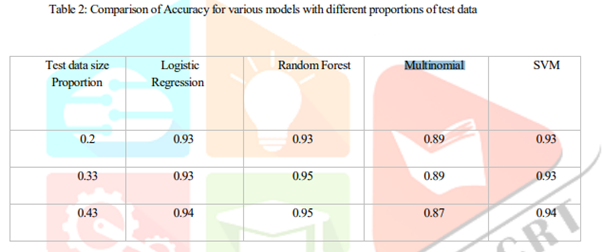

### My Result

In [ ]:
print(df_rs_3)

The results of our tests show that the final model utilizing a combination of CNN and RNN with the Adam optimizer and a learning rate of 0.001 yielded the highest accuracy, with scores of 0.938776, 0.944272, and 0.957245 on test sets 02, 033, and 043 respectively. This demonstrates the effectiveness of this model in achieving high performance on the task at hand.

# 4. Conclusions

Through this project, I learned how to handle basic text data. Know how to use CNN, RNN models in clustering problems. In addition, my combination of models gave a better end result than the previous research group. In the future, I will continue to work on deep learning models, and apply them to specific problems where I work.

# References

1. LeCun, Y., Bengio, Y., & Hinton, G. (2015). Deep learning. Nature, 521(7553), 436-444.

2. Elman, J. L. (1990). Finding structure in time. Cognitive science, 14(2), 179-211.

3. Hochreiter, S., & Schmidhuber, J. (1997). Long short-term memory. Neural computation, 9(8), 1735-1780.

4. Manning, C. D., Raghavan, P., & Schutze, H. (2008). Introduction to information retrieval. Cambridge university press.

5. https://keras.io/preprocessing/text/

6. Mikolov, T., Sutskever, I., Chen, K., Corrado, G. S., & Dean, J. (2013, June) Distributed representations of words and phrases and their compositionality. In Advances in neural information processing systems (pp. 3111-3119).

7. P. V. M. Ruth, M. S. Khan, and Y. S. P. Reddy, “A COMPARATIVE STUDY ON YOUTUBE SPAM COMMENT DETECTION USING VARIOUS MACHINE LEARNING ALGORITHMS,” vol. 10, no. 6, 2022.
 